In [1]:
import pandas as pd
df = pd.read_csv("C://Users/sampa/ai_class/data_files/seeds.csv", delimiter=r"\s+", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [3]:
df[7].value_counts()

1    70
2    70
3    70
Name: 7, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
X = df.drop(columns=[7])
y = df[7]

In [6]:
print(X.shape)
print(y.shape)

(210, 7)
(210,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

훈련 데이터 크기: (168, 7)
테스트 데이터 크기: (42, 7)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print("최종 훈련 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)
print("테스트 데이터 크기:", X_test.shape)

최종 훈련 데이터 크기: (134, 7)
검증 데이터 크기: (34, 7)
테스트 데이터 크기: (42, 7)


In [9]:
y_train = y_train - 1
y_val = y_val - 1

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 학습 데이터 기준으로 스케일링
X_val = scaler.transform(X_val)  # 검증 데이터 변환
X_test = scaler.transform(X_test)  # 테스트 데이터 변환

In [11]:
# 모델 생성 
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(7, ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

In [12]:
# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 835 (3.26 KB)
Trainable params: 835 (3.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/150


9/9 [==============================] - 1s 42ms/step - loss: 0.9746 - accuracy: 0.4925 - val_loss: 0.8931 - val_accuracy: 0.6176
Epoch 2/150
9/9 [==============================] - 0s 7ms/step - loss: 0.8481 - accuracy: 0.6866 - val_loss: 0.7796 - val_accuracy: 0.7059
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7470 - accuracy: 0.7836 - val_loss: 0.6912 - val_accuracy: 0.7647
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6653 - accuracy: 0.8060 - val_loss: 0.6255 - val_accuracy: 0.7647
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: 0.5957 - accuracy: 0.8209 - val_loss: 0.5724 - val_accuracy: 0.7941
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 0.5350 - accuracy: 0.8582 - val_loss: 0.5255 - val_accuracy: 0.7941
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 0.4831 - accuracy: 0.8881 - val_loss: 0.4861 - val_accuracy: 0.8529
Epoch 8/150
9/9 [=======

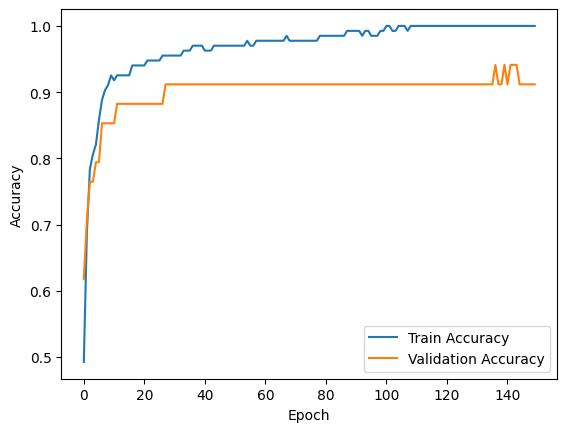

In [14]:
import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

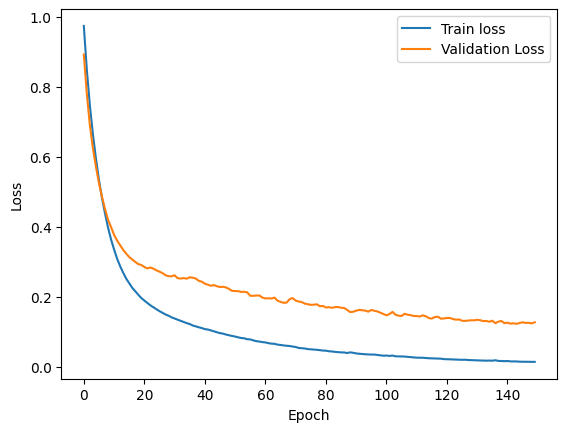

In [15]:
# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
y_test = y_test - 1

In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.3336 - accuracy: 0.8810


[0.3336372971534729, 0.8809523582458496]